In [2]:
!pip install neurolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=8f225e2e9aad34a1ec35f87cfe10087b18f7eba30e8df768ff29c9e6e046292a
  Stored in directory: /root/.cache/pip/wheels/1d/c0/44/7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab


In [84]:
import numpy as np
import neurolab as nl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [85]:
data = pd.read_csv('Date_Fruit_Datasets.csv')
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [86]:
data=data.dropna()
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [87]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Class']=lc.fit_transform(data['Class'])

In [88]:
sd = StandardScaler()
data.iloc[:,:-1] = sd.fit_transform(data.iloc[:,:-1])
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,1.155640,0.783942,0.604507,1.311643,-1.129568,1.075704,0.708628,1.108752,0.871873,-0.046797,...,-0.349683,-0.575281,0.218565,-1.342811,-1.267269,-0.822728,0.538340,0.435593,-0.023908,0
1,0.371700,0.067067,-0.187473,0.869789,-1.899771,0.431437,0.857410,0.323373,0.804852,-0.051373,...,-0.562154,-0.661407,-0.298009,-0.117030,-0.493225,-0.253422,-0.003550,0.284113,-0.024694,0
2,2.132265,1.439131,1.319121,1.921899,-0.993119,1.794103,0.791285,2.069149,0.547942,-0.045820,...,-0.171667,-0.333868,0.457986,-3.049848,-2.670541,-2.197277,0.958897,0.742335,0.355243,0
3,1.098729,0.716350,0.535970,1.308399,-1.250230,1.031228,0.714138,1.051992,0.737832,-0.047612,...,0.274066,0.935707,2.187189,-0.011006,-0.177706,-0.125142,-0.416894,-0.331475,-0.639369,0
4,0.459641,0.250603,0.091511,0.761463,-1.025822,0.507425,0.493720,0.431717,0.384115,-0.046056,...,-0.534895,-0.570286,0.309306,-0.399329,-0.406627,0.143293,0.167646,0.148910,-0.502579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.400168,-0.322843,-0.409550,-0.163681,-0.150746,-0.287167,-0.184067,-0.393707,-0.174385,-0.038246,...,-0.693781,-0.732092,-0.517759,0.321879,0.575335,0.623293,-0.062039,-0.408235,-0.525831,6
894,0.630951,1.481663,0.726851,0.487472,0.303708,0.652548,-1.941903,0.760612,-1.242983,-0.032570,...,-0.289526,-0.408827,0.102540,0.012032,0.413157,0.569055,-0.203952,-0.687141,-1.068502,6
895,-0.410179,-0.319497,-0.023043,-0.527567,0.847247,-0.297199,0.587398,-0.437594,-0.228374,-0.023312,...,-0.682158,-0.695066,-0.530011,0.471853,0.550449,0.682703,-0.370644,-0.567152,-0.658919,6
896,-0.553622,-0.369446,-0.237281,-0.473210,0.561945,-0.443347,-1.181460,-0.506189,-0.760811,-0.028584,...,-0.543439,-0.647409,-0.479247,0.284936,0.450864,0.533185,0.071247,-0.218832,-0.228759,6


In [92]:
from keras.utils import to_categorical

X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1:])
y = to_categorical(y,num_classes=7)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [93]:
X

array([[ 1.15563972,  0.78394219,  0.60450726, ...,  0.53834033,
         0.43559289, -0.02390791],
       [ 0.37169955,  0.06706714, -0.18747301, ..., -0.00354973,
         0.28411298, -0.02469438],
       [ 2.13226458,  1.4391311 ,  1.31912143, ...,  0.95889749,
         0.74233511,  0.3552428 ],
       ...,
       [-0.41017878, -0.31949739, -0.02304289, ..., -0.37064418,
        -0.56715228, -0.6589192 ],
       [-0.55362172, -0.36944589, -0.23728094, ...,  0.071247  ,
        -0.21883206, -0.22875922],
       [ 0.42446789,  0.56520261,  0.50723897, ..., -0.1705156 ,
        -0.71603977, -0.77948909]])

In [94]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(628, 34)
(270, 34)
(628, 7)
(270, 7)


In [96]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [97]:
input_size = []

In [98]:
col = data.columns
for i in col[:-1]:
    input_size.append([])
    input_size[-1].append(min(data[i].tolist()))
    input_size[-1].append(max(data[i].tolist()))
print(input_size)

[[-2.7644436542671653, 2.3115799234215464], [-2.7961869268202824, 1.8408135889707842], [-2.8760376799308567, 3.277635654659172], [-4.321950856125233, 2.369249715375589], [-4.428019974312576, 2.96051190636744], [-4.637263848844268, 1.9179718726991193], [-8.003409702746325, 0.8574104388287618], [-2.7730996039625535, 2.287272198762846], [-4.169526537404461, 2.2327524629044473], [-0.05984001999194877, 29.947729463309127], [-12.047001676552856, 1.6889976183389634], [-12.328314322346026, 2.589440413258192], [-0.08454042520524443, 29.933144089784605], [-1.6237246842518347, 5.858531974930451], [-6.935139501328143, 2.990393435104781], [-11.332350186977042, 0.5288102461860326], [-2.1733480490673225, 1.8525694685295302], [-2.0031615175361184, 2.426896076431212], [-2.40282750337713, 2.4064601584038896], [-3.449499120288577, 3.097329512357709], [-3.247346729871292, 3.503738779621953], [-4.283607957939448, 3.319730675038759], [-1.923571250630587, 3.3246358083485426], [-2.307986497869458, 3.014682272

In [99]:
len(input_size)

34

In [100]:
model = nl.net.newp(input_size,7)

In [101]:
error = model.train(X_train,y_train,epochs=100,show=1)

Epoch: 1; Error: 314.0;
Epoch: 2; Error: 197.0;
Epoch: 3; Error: 156.5;
Epoch: 4; Error: 175.5;
Epoch: 5; Error: 152.0;
Epoch: 6; Error: 112.0;
Epoch: 7; Error: 120.0;
Epoch: 8; Error: 118.0;
Epoch: 9; Error: 113.0;
Epoch: 10; Error: 117.0;
Epoch: 11; Error: 129.5;
Epoch: 12; Error: 114.0;
Epoch: 13; Error: 113.5;
Epoch: 14; Error: 122.5;
Epoch: 15; Error: 113.5;
Epoch: 16; Error: 101.0;
Epoch: 17; Error: 94.5;
Epoch: 18; Error: 97.0;
Epoch: 19; Error: 78.5;
Epoch: 20; Error: 93.0;
Epoch: 21; Error: 91.0;
Epoch: 22; Error: 98.0;
Epoch: 23; Error: 86.0;
Epoch: 24; Error: 105.0;
Epoch: 25; Error: 112.5;
Epoch: 26; Error: 82.5;
Epoch: 27; Error: 84.5;
Epoch: 28; Error: 95.5;
Epoch: 29; Error: 100.5;
Epoch: 30; Error: 122.5;
Epoch: 31; Error: 85.5;
Epoch: 32; Error: 91.0;
Epoch: 33; Error: 96.0;
Epoch: 34; Error: 85.0;
Epoch: 35; Error: 85.5;
Epoch: 36; Error: 87.5;
Epoch: 37; Error: 79.5;
Epoch: 38; Error: 90.0;
Epoch: 39; Error: 82.0;
Epoch: 40; Error: 78.5;
Epoch: 41; Error: 83.5;
Epoch

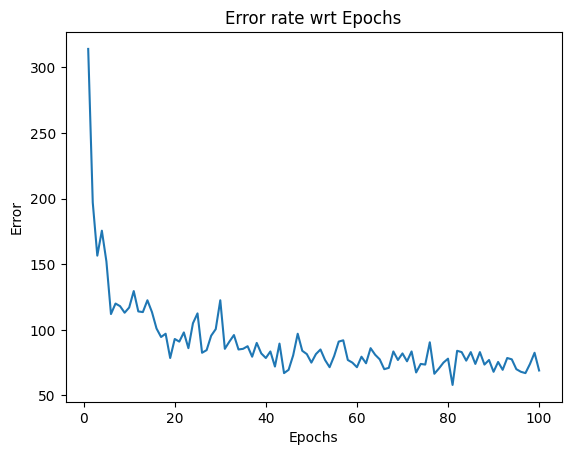

In [102]:
plt.plot(range(1,101),error)
plt.title('Error rate wrt Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [103]:
y_pred = model.sim(X_test)
y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [104]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7481481481481481
